In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.datasets import mnist

# 이미 훈련과 테스트가 분리된 데이터임
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# 데이터의 크기 확인
# 28X28X1 = 흑백데이터다~
print("train",x_train.shape,y_train.shape)
print("test",x_test.shape,y_test.shape)

train (60000, 28, 28) (60000,)
test (10000, 28, 28) (10000,)


In [4]:
# 크기변경
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
# y의 클래스 보기
a,b = np.unique(y_train,return_counts=1)
# print(np.unique(y_train,return_counts=1))
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


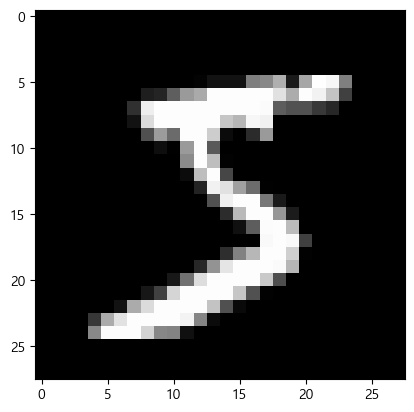

In [6]:
# 이미지 시각화
import matplotlib.pyplot as plt
plt.imshow(x_train[0],"gray")

In [7]:
# 모델
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
rate = 0.2
# model = Sequential([
#     # 5X5 이미지 채널 1개 
#     # 필터 = output 노드수 
#     # 자르는 필터는 2X2 사이즈 
#     Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"),
#     Conv2D(filters=64,kernel_size=(3,3),activation="relu"),   
#     MaxPooling2D(2,2),

#     Flatten(),
#     Dense(16,activation="relu"),
#     Dense(10,activation="softmax")
# ])

input1 = Input(shape=(28,28,1))
dense1 = Conv2D(filters=64,kernel_size=(3,3),activation="relu")(input1)
dense2 = Conv2D(filters=64,kernel_size=(3,3),activation="relu")(dense1)
dense3 = MaxPooling2D(2,2)(dense2)
dense4 = Flatten()(dense3)
dense5 =  Dense(16,activation="relu")(dense4)
output1 = Dense(10,activation="softmax")(dense5)

model=Model(inputs=input1,outputs=output1)



model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 16)                147472    
                                                             

In [8]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# earlyStopping = EarlyStopping(monitor="val_loss",
#                               mode="min",patience =10,
#                               # True 면 좋았던 웨이트로 복원됨
#                               # False 면 마지막 웨이트로 놔둠..
#                               restore_best_weights=True,
#                               verbose=1                              
#                               )
# 모델체크포인트는 가장 낮은 val_loss 가 갱신 될 떄 마다 저장합니다.

# mcp = ModelCheckpoint(
#     monitor="val_loss",
#     mode="auto",
#     save_best_only=True,
#     filepath= "mnlist.h5",
#     verbose=1 
# )
                    

hist = model.fit(
                x_train,
                y_train,
                epochs=8,
                batch_size=64,
                validation_split=0.2,
                verbose=1,
                # callbacks = [earlyStopping,mcp],      
                )

Epoch 1/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0336 - acc: 0.9893 - val_loss: 0.1079 - val_acc: 0.9774
Epoch 2/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0306 - acc: 0.9904 - val_loss: 0.1504 - val_acc: 0.9697
Epoch 3/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0276 - acc: 0.9917 - val_loss: 0.1132 - val_acc: 0.9760
Epoch 4/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0275 - acc: 0.9916 - val_loss: 0.1383 - val_acc: 0.9745
Epoch 5/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0223 - acc: 0.9927 - val_loss: 0.1346 - val_acc: 0.9772
Epoch 6/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0192 - acc: 0.9937 - val_loss: 0.1314 - val_acc: 0.9793
Epoch 7/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0173 - acc: 0.9943 - val_loss: 0.1471 - val_acc: 0.9771
Epoch 8/8
750/750 [==============================] - 4s 5ms/step - loss: 0.0209 - a

In [10]:
loss,acc = model.evaluate(x_test,y_test)
print("loss : ",loss)
print("acc : ",acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.1276 - acc: 0.9673
loss :  0.12758882343769073
acc :  0.9672999978065491
